# I. Preprocessing data

## 1. Data cleaning

### 1.1 Combine holiday and weather to the main dataframe

In [1]:
import pandas as pd
import glob

Read all files

In [2]:
#Read holiday data
path = '/Users/andynguyen/Downloads/dotdata/holidays.csv'
holiday = pd.read_csv(path,sep=";", keep_default_na=False)
#Read weather data
path = '/Users/andynguyen/Downloads/dotdata/2015_weather.csv'
weather = pd.read_csv(path,sep=";")

#Read trip files
path = r'/Users/andynguyen/Downloads/dotdata/data/'

# List of all CSV files in the directory
all_files = glob.glob(path + "/*.csv")

# Read and concatenate all CSV files
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)


In [3]:
# Datetime need to be proper formatted
holiday['Date'] = pd.to_datetime(holiday['Date'], format='%d.%m.%y').dt.date
display(holiday.transpose())
display(holiday.info())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Date,2015-01-01,2015-01-19,2015-02-12,2015-02-16,2015-05-10,2015-05-25,2015-06-21,2015-07-03,2015-09-07,2015-10-12,2015-11-11,2015-11-26,2015-11-27,2015-12-25
Holiday,New Years Day,Martin Luther King Jr. Day,Lincoln's Birthday,Presidents' Day,Mother's Day,Memorial Day,Father's Day,Independence Day (observed),Labor Day,Columbus Day,Veterans Day,Thanksgiving,Day after Thanksgiving,Christmas Day


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     14 non-null     object
 1   Holiday  14 non-null     object
dtypes: object(2)
memory usage: 356.0+ bytes


None

In [4]:
display(weather.head(3))

,pickup_date,avg_temp_C,Rain,Fog,Snow
0,01.01.15,1,NaN,NaN,NaN
1,02.01.15,4,NaN,NaN,NaN
2,03.01.15,3,1.0,NaN,1.0


In [5]:
# Format pick up date column
weather['pickup_date'] = pd.to_datetime(weather['pickup_date'], format='%d.%m.%y').dt.date
display(weather.head())
display(weather.info())

,pickup_date,avg_temp_C,Rain,Fog,Snow
0,2015-01-01,1,NaN,NaN,NaN
1,2015-01-02,4,NaN,NaN,NaN
2,2015-01-03,3,1.0,NaN,1.0
3,2015-01-04,9,1.0,NaN,NaN
4,2015-01-05,2,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pickup_date  365 non-null    object 
 1   avg_temp_C   365 non-null    int64  
 2   Rain         97 non-null     float64
 3   Fog          21 non-null     float64
 4   Snow         25 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 14.4+ KB


None

In [6]:
# Combine bad weather for further analysis
weather['weather_type'] = weather.apply(lambda row: ','.join([col for col in ['Rain', 'Fog', 'Snow'] if row[col] == 1]) or 'Normal', axis=1)
display(weather.head(3))
display(weather.info())

,pickup_date,avg_temp_C,Rain,Fog,Snow,weather_type
0,2015-01-01,1,NaN,NaN,NaN,Normal
1,2015-01-02,4,NaN,NaN,NaN,Normal
2,2015-01-03,3,1.0,NaN,1.0,"Rain,Snow"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pickup_date   365 non-null    object 
 1   avg_temp_C    365 non-null    int64  
 2   Rain          97 non-null     float64
 3   Fog           21 non-null     float64
 4   Snow          25 non-null     float64
 5   weather_type  365 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 17.2+ KB


None

In [7]:
display(df.head(3))
display(df.info())

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_zip,pickup_borough,pickup_neighborhood,dropoff_zip,dropoff_borough,dropoff_neighborhood
0,1,2015-09-04 11:15:36,2015-09-04 11:26:53,1,1.60,-73.985619,40.736015,1,N,-73.999237,...,2.0,0.0,0.3,11.8,10010,Manhattan,Gramercy Park and Murray Hill,10013,Manhattan,Greenwich Village and Soho
1,1,2015-09-29 18:46:36,2015-09-29 18:49:55,4,0.80,-73.995811,40.754478,1,N,-74.003136,...,0.0,0.0,0.3,6.8,10018,Manhattan,Chelsea and Clinton,10001,Manhattan,Chelsea and Clinton
2,2,2015-09-30 13:23:32,2015-09-30 13:52:55,1,1.15,-73.960823,40.775372,1,N,-73.967224,...,0.0,0.0,0.3,18.3,10075,Manhattan,Upper East Side,10022,Manhattan,Gramercy Park and Murray Hill


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1200000 non-null  int64  
 1   pickup_datetime        1200000 non-null  object 
 2   dropoff_datetime       1200000 non-null  object 
 3   passenger_count        1200000 non-null  int64  
 4   trip_distance          1200000 non-null  float64
 5   pickup_longitude       1200000 non-null  float64
 6   pickup_latitude        1200000 non-null  float64
 7   RateCodeID             1200000 non-null  int64  
 8   store_and_fwd_flag     1200000 non-null  object 
 9   dropoff_longitude      1200000 non-null  float64
 10  dropoff_latitude       1200000 non-null  float64
 11  payment_type           1200000 non-null  int64  
 12  fare_amount            1200000 non-null  float64
 13  extra                  1200000 non-null  float64
 14  mta_tax           

None

In [8]:
# Convert 'pickup_datetime' to datetime format
df['pickup_date'] = pd.to_datetime(df['pickup_datetime']).dt.date
df['pickup_time'] = pd.to_datetime(df['pickup_datetime']).dt.time

In [9]:
# Merge Holiday to the main dataframe df:
df = df.merge(holiday, left_on='pickup_date', right_on = 'Date', how='left')
df.drop('Date', axis=1, inplace=True)

In [10]:
# Crosscheck df
filtered_df = df[['pickup_date', 'Holiday']][(df['Holiday'] == 'Christmas Day') | (df['Holiday'] == 'Columbus Day')]
pivot_df = filtered_df.pivot_table(index='pickup_date', columns='Holiday', aggfunc=len, fill_value=0)
pivot_df

Holiday,Christmas Day,Columbus Day
pickup_date,,
2015-10-12,0,2694
2015-12-25,1651,0


In [11]:
# If that day is not a holiday, display as 'No holiday'
df['Holiday'] = df['Holiday'].fillna('No holiday')

In [12]:
# Merge weather to thee main dataframe df:
df = df.merge(weather[['pickup_date', 'avg_temp_C', 'Rain', 'Fog', 'Snow', 'weather_type']],
              on='pickup_date', how='left')

#Fill in missing value of weather with 0, mean either no rain, no fog, or no snow.
df['Rain'] = df['Rain'].fillna(0)
df['Fog'] = df['Fog'].fillna(0)
df['Snow'] = df['Snow'].fillna(0)

In [13]:
display(df.head(3))
display(df.info())

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,...,dropoff_borough,dropoff_neighborhood,pickup_date,pickup_time,Holiday,avg_temp_C,Rain,Fog,Snow,weather_type
0,1,2015-09-04 11:15:36,2015-09-04 11:26:53,1,1.60,-73.985619,40.736015,1,N,-73.999237,...,Manhattan,Greenwich Village and Soho,2015-09-04,11:15:36,No holiday,26,0.0,0.0,0.0,Normal
1,1,2015-09-29 18:46:36,2015-09-29 18:49:55,4,0.80,-73.995811,40.754478,1,N,-74.003136,...,Manhattan,Chelsea and Clinton,2015-09-29,18:46:36,No holiday,26,1.0,0.0,0.0,Rain
2,2,2015-09-30 13:23:32,2015-09-30 13:52:55,1,1.15,-73.960823,40.775372,1,N,-73.967224,...,Manhattan,Gramercy Park and Murray Hill,2015-09-30,13:23:32,No holiday,21,1.0,0.0,0.0,Rain


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 33 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1200000 non-null  int64  
 1   pickup_datetime        1200000 non-null  object 
 2   dropoff_datetime       1200000 non-null  object 
 3   passenger_count        1200000 non-null  int64  
 4   trip_distance          1200000 non-null  float64
 5   pickup_longitude       1200000 non-null  float64
 6   pickup_latitude        1200000 non-null  float64
 7   RateCodeID             1200000 non-null  int64  
 8   store_and_fwd_flag     1200000 non-null  object 
 9   dropoff_longitude      1200000 non-null  float64
 10  dropoff_latitude       1200000 non-null  float64
 11  payment_type           1200000 non-null  int64  
 12  fare_amount            1200000 non-null  float64
 13  extra                  1200000 non-null  float64
 14  mta_tax           

None

### 1.2 Getting trip Distance

In [14]:
df['trip_distance'].describe()

count    1.200000e+06
mean     1.235900e+01
std      1.077188e+04
min      0.000000e+00
25%      1.000000e+00
50%      1.700000e+00
75%      2.960000e+00
max      1.180000e+07
Name: trip_distance, dtype: float64

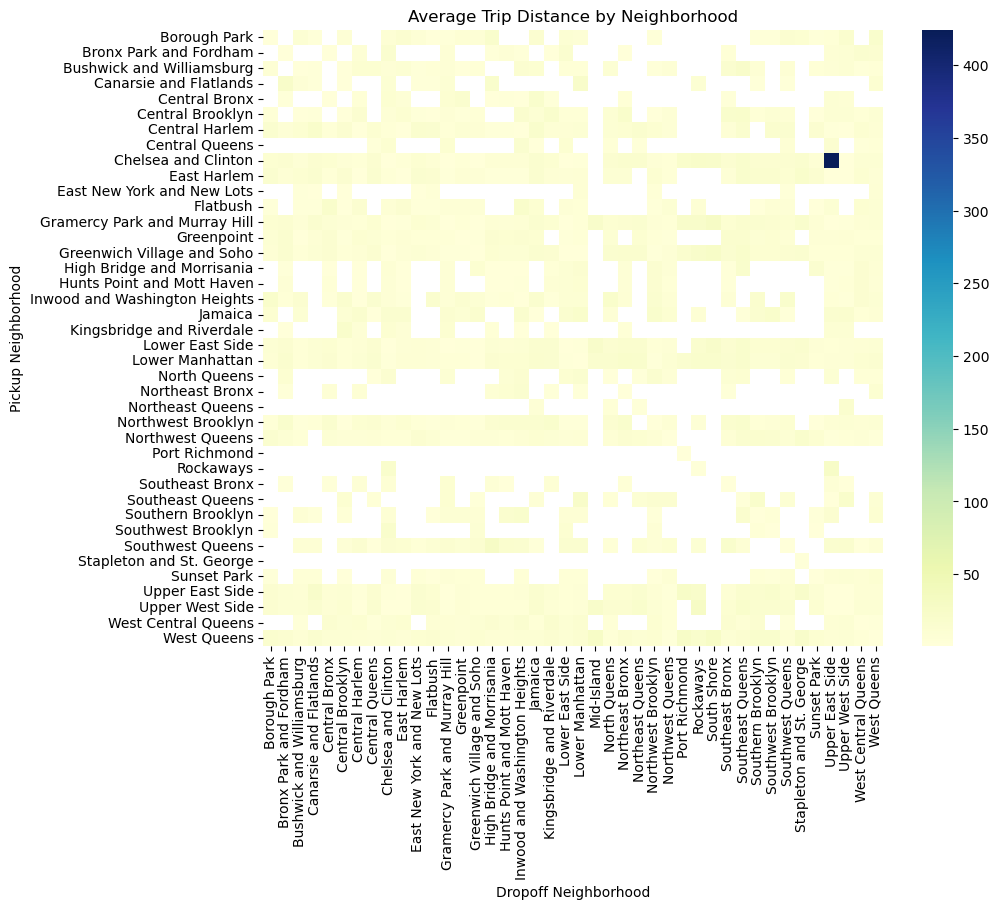

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

pivot_table = df.pivot_table(index='pickup_neighborhood', columns='dropoff_neighborhood', values='trip_distance', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap="YlGnBu", cbar=True)
plt.xlabel('Dropoff Neighborhood')
plt.ylabel('Pickup Neighborhood')
plt.title('Average Trip Distance by Neighborhood')
plt.show()

In [16]:
pivot_table.iloc[[8]]

dropoff_neighborhood,Borough Park,Bronx Park and Fordham,Bushwick and Williamsburg,Canarsie and Flatlands,Central Bronx,Central Brooklyn,Central Harlem,Central Queens,Chelsea and Clinton,East Harlem,...,Southeast Queens,Southern Brooklyn,Southwest Brooklyn,Southwest Queens,Stapleton and St. George,Sunset Park,Upper East Side,Upper West Side,West Central Queens,West Queens
pickup_neighborhood,,,,,,,,,,,,,,,,,,,,,
Chelsea and Clinton,11.251774,12.482167,6.814888,13.313455,10.871263,7.31791,5.337387,12.6884,1.166554,4.628129,...,18.194815,13.608131,12.974483,12.998087,16.41381,7.874308,424.51941,2.247093,9.091404,9.940048


There is a significantly long distance when pick up in 'Chelsea & Clinton', but drop off in Upper West Side indicate more than 400 miles

In [17]:
# Create duration column
df['trip_duration'] = pd.to_datetime(df['dropoff_datetime']) -  pd.to_datetime(df['pickup_datetime'])
data_todrop = df[(df['trip_distance'] > 100) & (df['pickup_neighborhood'] == "Chelsea and Clinton")][['pickup_datetime',
                                                                                        'dropoff_datetime', 'passenger_count', 'pickup_neighborhood',
                                                                                        'dropoff_neighborhood', 'trip_distance', 'pickup_longitude',
                                                                                        'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
                                                                                        'tip_amount', 'fare_amount', 'trip_duration', 'weather_type']]

In [18]:
# Drop the outliner since the data seems wrong when the distance is extremely high but duration is only 30 mins
df = df.drop(data_todrop.index)

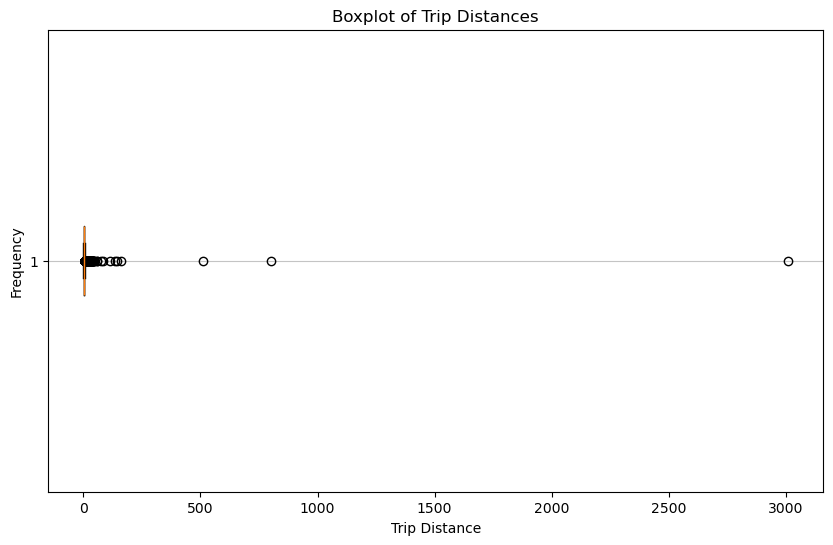

In [19]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.boxplot(df['trip_distance'],vert=False)
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.title('Boxplot of Trip Distances')
plt.grid(axis='y', alpha=0.75)
plt.show()

Plot again the overall Trip distance and we see some outliners still there. Now we can cross check with mahalanobis distance for total value of the column trip_distance.

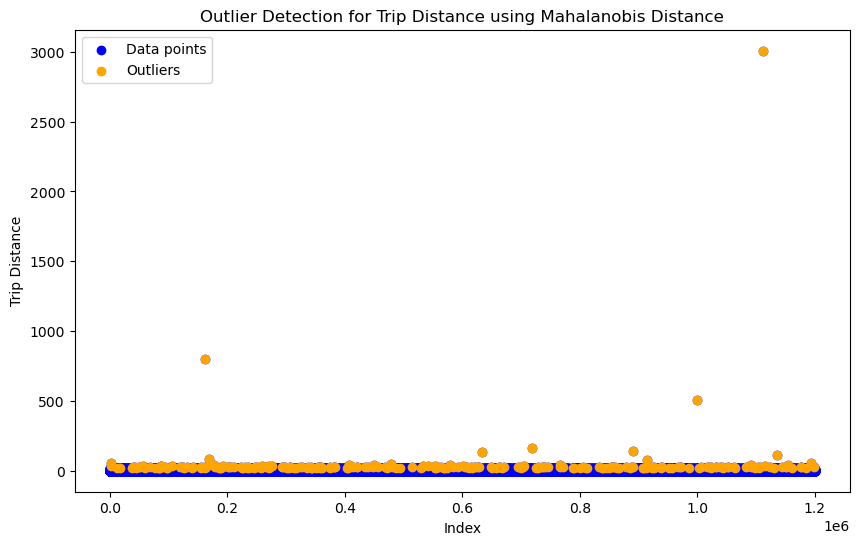

Number of outliers: 242


In [50]:
import numpy as np
from scipy.spatial.distance import mahalanobis
import matplotlib.pyplot as plt

# Calculate the mean and covariance matrix for trip_distance
mean_trip_distance = df['trip_distance'].mean()
cov_trip_distance = np.cov(df['trip_distance'])

# Calculate Mahalanobis distance for each trip_distance value
mahalanobis_distances = [mahalanobis([x], [mean_trip_distance], cov_trip_distance) for x in df['trip_distance']]

# Threshold is within 3 standard deviation
threshold = np.mean(mahalanobis_distances) + 5 * np.std(mahalanobis_distances)

# Plot the data points and highlight outliers
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['trip_distance'], c='b', label='Data points')
plt.scatter(df.index[np.array(mahalanobis_distances) > threshold], df['trip_distance'][np.array(mahalanobis_distances) > threshold], c='orange', label='Outliers')
plt.xlabel('Index')
plt.ylabel('Trip Distance')
plt.title('Outlier Detection for Trip Distance using Mahalanobis Distance')
plt.legend()
plt.show()

# Count outliers
outlier_count = np.sum(mahalanobis_distances > threshold)
print("Number of outliers:", outlier_count)

In [51]:
df['borough_pair'] = df['pickup_borough'] + ' - ' + df['dropoff_borough']
columns_to_display = ['borough_pair','trip_duration', 'trip_distance', 'total_amount']
df_outliner = df[columns_to_display][mahalanobis_distances > threshold].sort_values(by='trip_distance', ascending=False)
display(df_outliner.head(25))

,borough_pair,trip_duration,trip_distance,total_amount
1112401,Manhattan - Manhattan,0 days 00:23:38,3008.30,16.30
161247,Manhattan - Manhattan,0 days 00:13:20,800.30,13.30
1000130,Manhattan - Manhattan,0 days 00:11:44,509.20,13.00
718698,Manhattan - Queens,0 days 01:04:21,162.70,8.63
891240,Manhattan - Brooklyn,0 days 01:02:29,142.00,3.30
633667,Brooklyn - Brooklyn,0 days 00:38:27,134.00,64.17
1136553,Queens - Manhattan,0 days 00:52:40,111.70,14.38
169432,Manhattan - Brooklyn,0 days 00:50:22,83.60,40.30
914565,Queens - Manhattan,0 days 00:28:07,74.90,9.84
1193366,Manhattan - Queens,0 days 01:31:23,58.84,290.34


For those trip longer than 50 miles, the total amount driver received seem very small so I will remove those one only

In [52]:
outlier_indices = df_outliner[df_outliner['trip_distance'] > 50].index
df = df.drop(outlier_indices)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1199988 entries, 0 to 1199999
Data columns (total 35 columns):
 #   Column                 Non-Null Count    Dtype          
---  ------                 --------------    -----          
 0   VendorID               1199988 non-null  int64          
 1   pickup_datetime        1199988 non-null  object         
 2   dropoff_datetime       1199988 non-null  object         
 3   passenger_count        1199988 non-null  int64          
 4   trip_distance          1199988 non-null  float64        
 5   pickup_longitude       1199988 non-null  float64        
 6   pickup_latitude        1199988 non-null  float64        
 7   RateCodeID             1199988 non-null  int64          
 8   store_and_fwd_flag     1199988 non-null  object         
 9   dropoff_longitude      1199988 non-null  float64        
 10  dropoff_latitude       1199988 non-null  float64        
 11  payment_type           1199988 non-null  int64          
 12  fare_amount        

### 1.3 Getting trip duration

In [25]:
df['trip_duration'].describe()

count                      1199988
mean     0 days 00:13:05.225444754
std      0 days 00:09:11.067026192
min                0 days 00:01:01
25%                0 days 00:06:36
50%                0 days 00:10:47
75%                0 days 00:17:05
max                0 days 01:59:27
Name: trip_duration, dtype: object

There are no extreme trip duration, maximum was just within 2 hours driving.
Next I want to see if trip duration has any ouliners by checking with mahalanobis again.

In [22]:
df['trip_duration_minutes'] = df['trip_duration'].dt.total_seconds() / 60

In [30]:
df.columns

Index(['VendorID', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude', 'RateCodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'pickup_zip',
       'pickup_borough', 'pickup_neighborhood', 'dropoff_zip',
       'dropoff_borough', 'dropoff_neighborhood', 'pickup_date', 'pickup_time',
       'Holiday', 'avg_temp_C', 'Rain', 'Fog', 'Snow', 'weather_type',
       'trip_duration', 'borough_pair', 'trip_duration_minutes'],
      dtype='object')

<Figure size 1200x600 with 0 Axes>

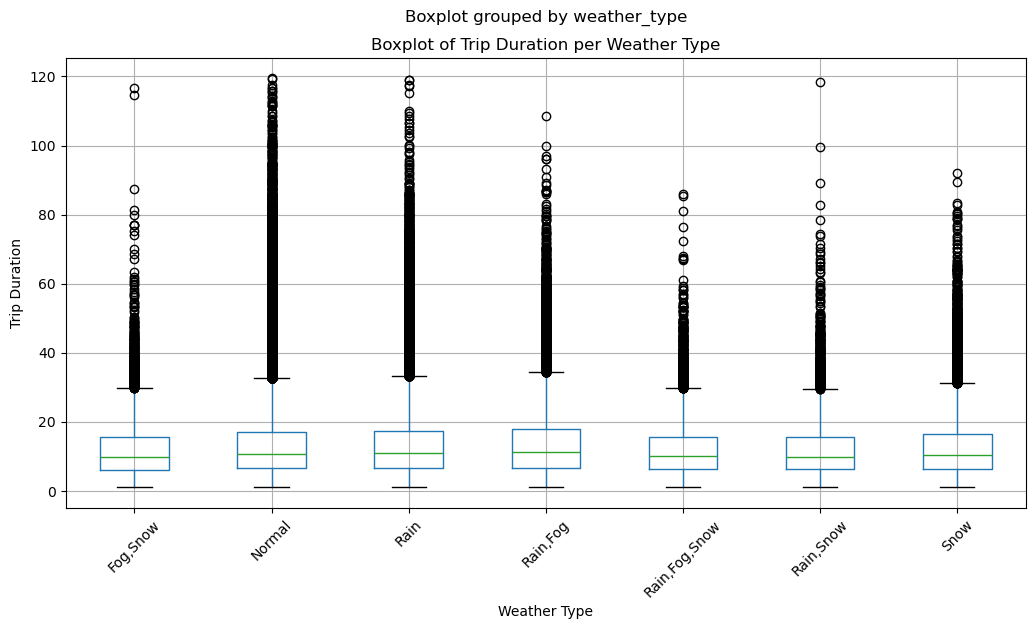

In [27]:
import matplotlib.pyplot as plt

# Plot boxplot of trip_duration per weather_type
plt.figure(figsize=(12, 6))
df.boxplot(column='trip_duration_minutes', by='weather_type', figsize=(12, 6))
plt.xlabel('Weather Type')
plt.ylabel('Trip Duration')
plt.title('Boxplot of Trip Duration per Weather Type')
plt.xticks(rotation=45)
plt.show()


In [23]:
df['borough_pair'] = df['pickup_borough'] + ' - ' + df['dropoff_borough']

<Figure size 1200x600 with 0 Axes>

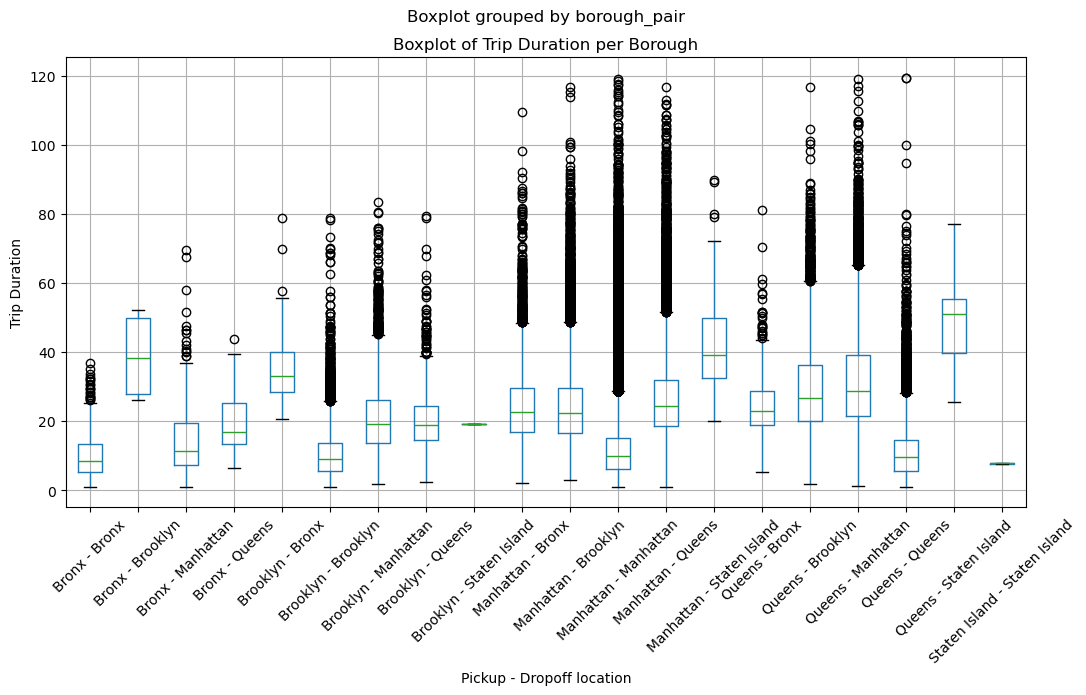

In [28]:

# Plot boxplot of trip_duration per borough pair:
plt.figure(figsize=(12, 6))
df.boxplot(column='trip_duration_minutes', by='borough_pair', figsize=(12, 6))
plt.xlabel('Pickup - Dropoff location')
plt.ylabel('Trip Duration')
plt.title('Boxplot of Trip Duration per Borough')
plt.xticks(rotation=45)
plt.show()


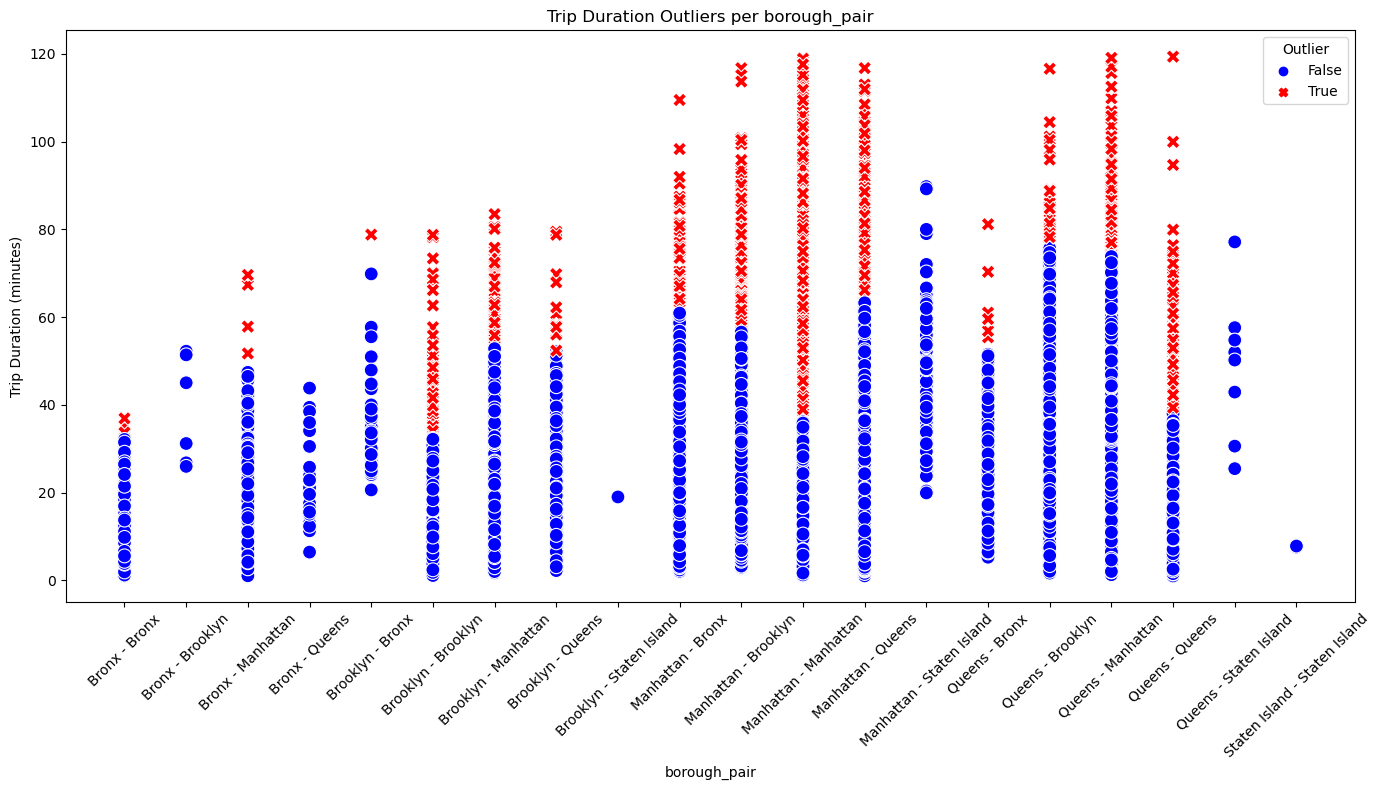

In [29]:
import matplotlib.pyplot as plt
from scipy.stats import zscore
df_copy = df[['borough_pair', 'trip_duration_minutes']].copy()

groups = df_copy.groupby('borough_pair')

# Function to calculate standardized z-scores
def calculate_zscore(group):
    group['zscore'] = zscore(group['trip_duration_minutes'].values)
    return group

# Apply the function to each group
df_copy = groups.apply(calculate_zscore)

# Seting threshold at 98 quantile
threshold = df_copy['zscore'].abs().quantile(0.99)

# Identify outliers
df_copy['is_outlier'] = df_copy['zscore'].abs() > threshold

# Plotting
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_copy, x='borough_pair', y='trip_duration_minutes', hue='is_outlier', palette={True: 'red', False: 'blue'}, style='is_outlier', markers={True: 'X', False: 'o'}, s=100)
plt.title('Trip Duration Outliers per borough_pair')
plt.xlabel('borough_pair')
plt.ylabel('Trip Duration (minutes)')
plt.legend(title='Outlier')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

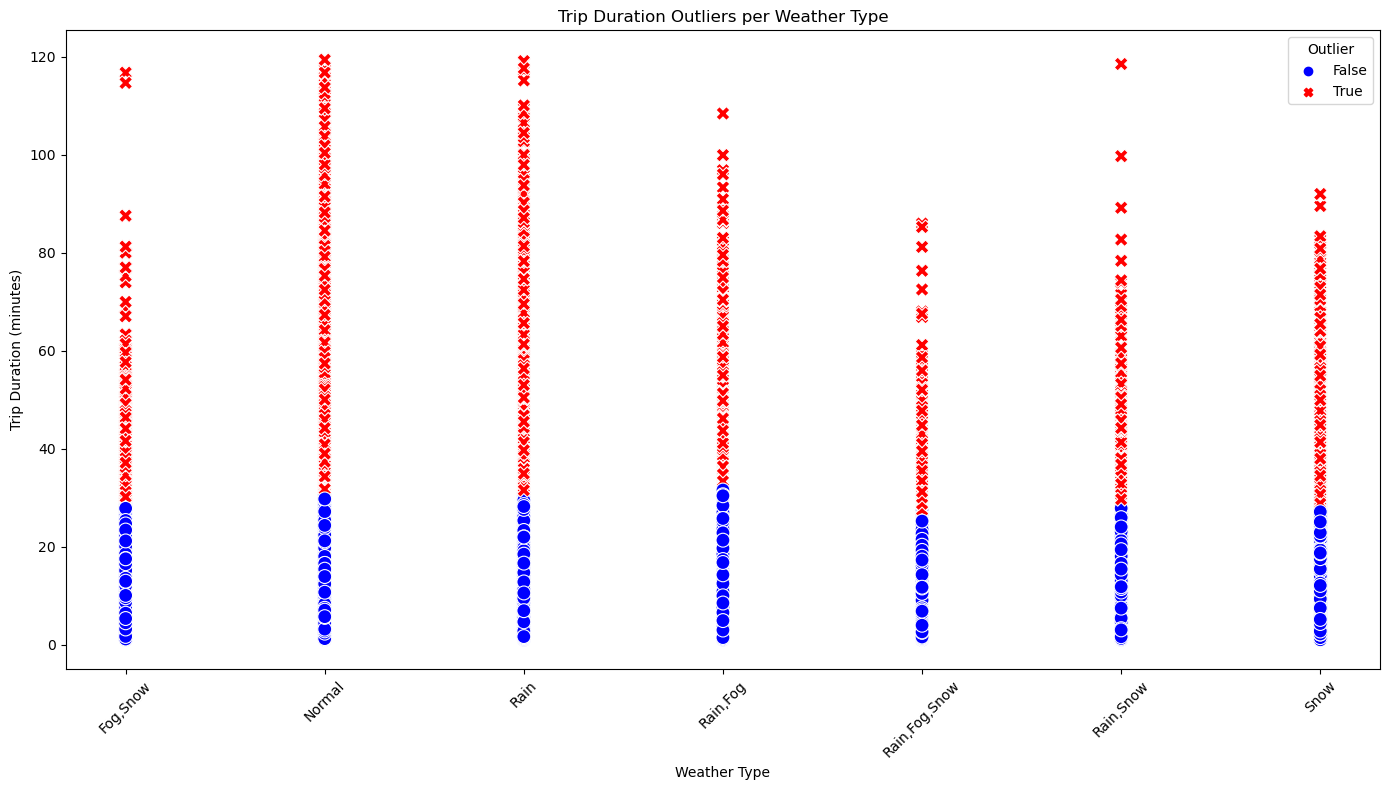

In [30]:
import matplotlib.pyplot as plt
from scipy.stats import zscore
df_copy = df[['weather_type', 'trip_duration_minutes']].copy()

groups = df_copy.groupby('weather_type')

# Function to calculate standardized z-scores
def calculate_zscore(group):
    group['zscore'] = zscore(group['trip_duration_minutes'].values)
    return group

# Apply the function to each group
df_copy = groups.apply(calculate_zscore)

# Define a threshold to identify outliers (e.g., using the 95th percentile of absolute z-scores)
threshold = df_copy['zscore'].abs().quantile(0.95)

# Identify outliers
df_copy['is_outlier'] = df_copy['zscore'].abs() > threshold

# Plotting
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_copy, x='weather_type', y='trip_duration_minutes', hue='is_outlier', palette={True: 'red', False: 'blue'}, style='is_outlier', markers={True: 'X', False: 'o'}, s=100)
plt.title('Trip Duration Outliers per Weather Type')
plt.xlabel('Weather Type')
plt.ylabel('Trip Duration (minutes)')
plt.legend(title='Outlier')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observation**:
- When weather condition is harsh, trip duration is lightly shorter, and the outliners are also lower then when in better weather.
- When map the borough (distict) as a pair of pickup-dropoff. We can see the outliners are different at each pair.
- Maximum time for a trip can be upto 2 hours (120 mins) which is acceptable in some special scenarios (e.g., customer may want the driver to wait..)
- Hence I will keep outliner as it is and not remove any

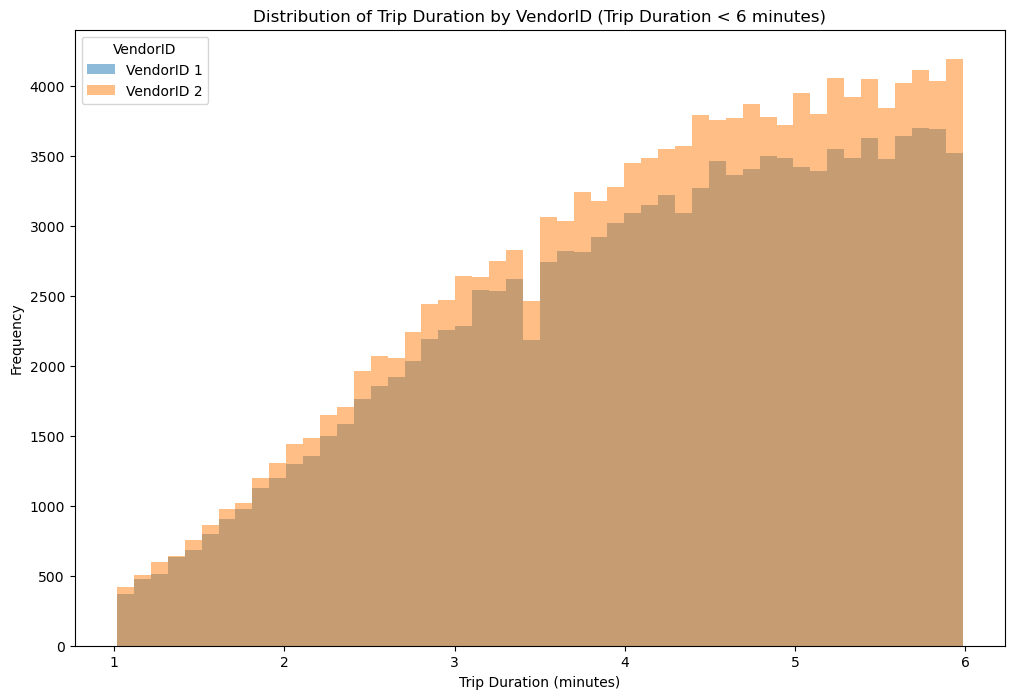

In [32]:
# Filter the data to include only trips with duration less than 6 minutes
df_filtered = df[df['trip_duration_minutes'] < 6]

# Create histograms for each VendorID
vendor_ids = df_filtered['VendorID'].unique()
plt.figure(figsize=(12, 8))

# Define the number of bins
bins = 50

# Plot histogram for each VendorID
for vendor_id in vendor_ids:
    subset = df_filtered[df_filtered['VendorID'] == vendor_id]['trip_duration_minutes']
    plt.hist(subset, bins=bins, alpha=0.5, label=f'VendorID {vendor_id}')

# Customize the plot
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Duration by VendorID (Trip Duration < 6 minutes)')
plt.legend(title='VendorID')
plt.show()


Normal distribution between vendors, where the trip last just for a few minutes, it coult potentially happens like customer changing their mind when the trip already start. So no further action needed in this case

# II. Exploratory Data Analysis

## 1. Categorical Variables

In [33]:
print(df.columns)
display(df.head())
display(df.info())

Index(['VendorID', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude', 'RateCodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'pickup_zip',
       'pickup_borough', 'pickup_neighborhood', 'dropoff_zip',
       'dropoff_borough', 'dropoff_neighborhood', 'pickup_date', 'pickup_time',
       'Holiday', 'avg_temp_C', 'Rain', 'Fog', 'Snow', 'weather_type',
       'trip_duration', 'borough_pair', 'trip_duration_minutes'],
      dtype='object')


,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,...,pickup_time,Holiday,avg_temp_C,Rain,Fog,Snow,weather_type,trip_duration,borough_pair,trip_duration_minutes
0,1,2015-09-04 11:15:36,2015-09-04 11:26:53,1,1.60,-73.985619,40.736015,1,N,-73.999237,...,11:15:36,No holiday,26,0.0,0.0,0.0,Normal,0 days 00:11:17,Manhattan - Manhattan,11.283333
1,1,2015-09-29 18:46:36,2015-09-29 18:49:55,4,0.80,-73.995811,40.754478,1,N,-74.003136,...,18:46:36,No holiday,26,1.0,0.0,0.0,Rain,0 days 00:03:19,Manhattan - Manhattan,3.316667
2,2,2015-09-30 13:23:32,2015-09-30 13:52:55,1,1.15,-73.960823,40.775372,1,N,-73.967224,...,13:23:32,No holiday,21,1.0,0.0,0.0,Rain,0 days 00:29:23,Manhattan - Manhattan,29.383333
3,2,2015-09-10 20:45:32,2015-09-10 21:16:04,1,4.72,-73.983200,40.767639,1,N,-74.009743,...,20:45:32,No holiday,24,1.0,1.0,0.0,"Rain,Fog",0 days 00:30:32,Manhattan - Manhattan,30.533333
4,2,2015-09-13 19:11:14,2015-09-13 19:26:46,1,8.28,-73.871361,40.773987,1,N,-73.976547,...,19:11:14,No holiday,22,1.0,0.0,0.0,Rain,0 days 00:15:32,Queens - Manhattan,15.533333


<class 'pandas.core.frame.DataFrame'>
Index: 1199988 entries, 0 to 1199999
Data columns (total 36 columns):
 #   Column                 Non-Null Count    Dtype          
---  ------                 --------------    -----          
 0   VendorID               1199988 non-null  int64          
 1   pickup_datetime        1199988 non-null  object         
 2   dropoff_datetime       1199988 non-null  object         
 3   passenger_count        1199988 non-null  int64          
 4   trip_distance          1199988 non-null  float64        
 5   pickup_longitude       1199988 non-null  float64        
 6   pickup_latitude        1199988 non-null  float64        
 7   RateCodeID             1199988 non-null  int64          
 8   store_and_fwd_flag     1199988 non-null  object         
 9   dropoff_longitude      1199988 non-null  float64        
 10  dropoff_latitude       1199988 non-null  float64        
 11  payment_type           1199988 non-null  int64          
 12  fare_amount        

None

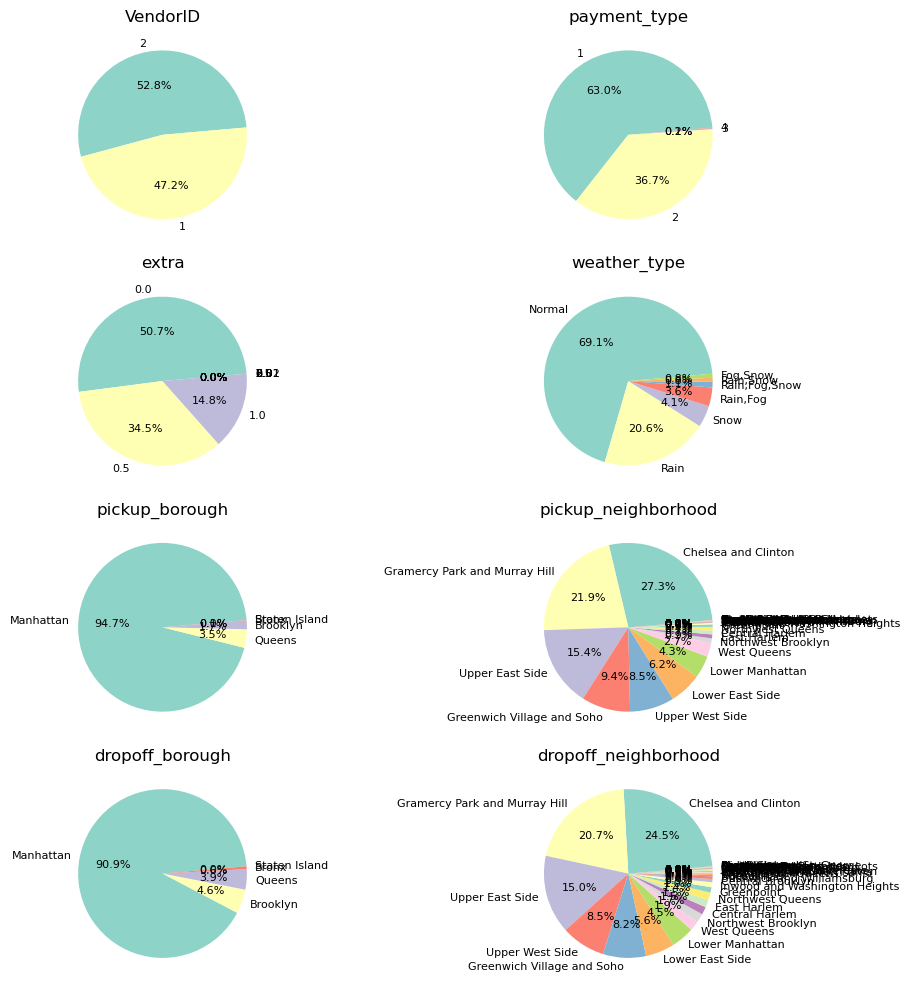

In [24]:
import seaborn as sns
cat_cols = ['VendorID', 'payment_type', 'extra',
            'pickup_zip','pickup_borough','pickup_neighborhood',
            'dropoff_zip', 'dropoff_borough', 'dropoff_neighborhood',
            'weather_type']
selected_cat_cols = ['VendorID', 'payment_type', 'extra','weather_type',
            'pickup_borough','pickup_neighborhood',
           'dropoff_borough', 'dropoff_neighborhood']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))

axes = axes.flatten()

# pie chart
for i, col in enumerate(selected_cat_cols):
    # count of each category
    counts = df[col].value_counts()

    axes[i].pie(counts, labels=counts.index,
                autopct='%1.1f%%', textprops={'fontsize': 8},
                startangle=5, colors=sns.color_palette('Set3'))
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

Data has multiple data related to the location of pick up and dropoff. Due to simplicity I will remove some features:

*   Drop Neiborhood because it is the detailed info under each borough
*   Drop pickup_zip and dropoff_drip
*   Drop pickup_longitude, pickup_latitude, dropoff_longtitude, dropoff_latitude



### Numerical variable

#### 1. Customer demand trend for Weekday and Weekend/ Holiday

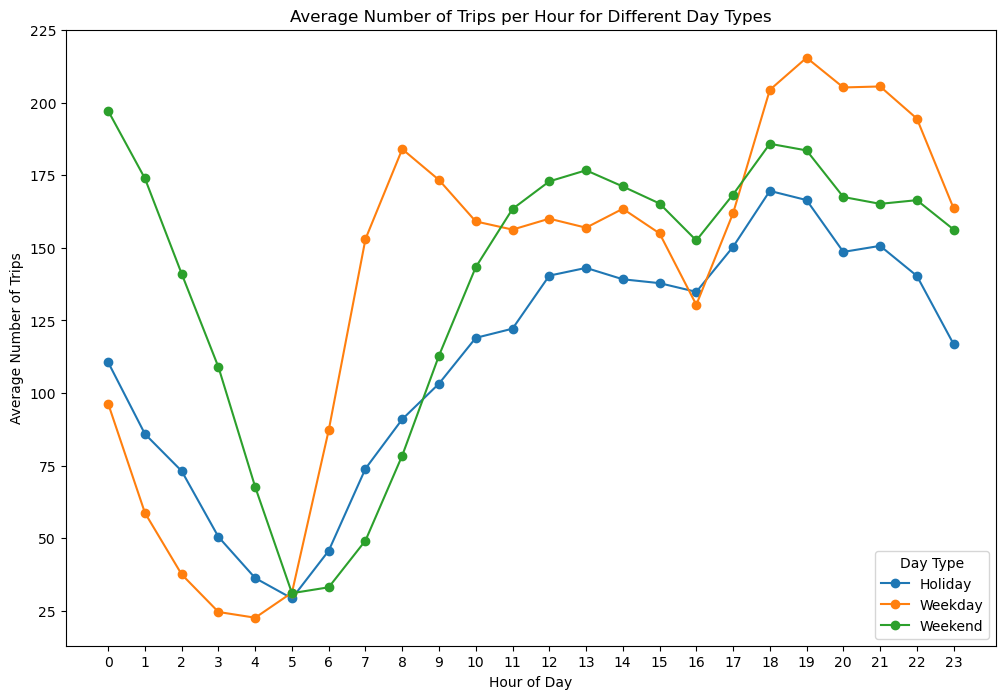

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert pickup_datetime to datetime if not already in datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extract day of the week and categorize days
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['pickup_date'] = df['pickup_datetime'].dt.date

# Define the logic for the peak_day column
def classify_peak_day(row):
    if row['day_of_week'] >= 5:
        return 'Weekend'
    elif row['Holiday'] != 'No holiday':
        return 'Holiday'
    else:
        return 'Weekday'

# Apply the function to create the peak_day column
df['peak_day'] = df.apply(classify_peak_day, axis=1)

# Extract hour from pickup_datetime
df['pickup_hour'] = df['pickup_datetime'].dt.hour

# Count the number of trips per hour per peak_day
daily_hourly_trip_counts = df.groupby(['pickup_date', 'peak_day', 'pickup_hour']).size().reset_index(name='trip_count')

# Calculate the average number of trips per hour for each peak_day category
avg_hourly_trip_counts = daily_hourly_trip_counts.groupby(['peak_day', 'pickup_hour'])['trip_count'].mean().unstack(fill_value=0)

# Plot the line chart with different lines for each peak_day category
plt.figure(figsize=(12, 8))
for day_type in avg_hourly_trip_counts.index:
    plt.plot(avg_hourly_trip_counts.columns, avg_hourly_trip_counts.loc[day_type], marker='o', label=day_type)

plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Trips')
plt.title('Average Number of Trips per Hour for Different Day Types')
plt.xticks(range(0, 24))
plt.legend(title='Day Type', loc='lower right')
plt.grid(False)
plt.show()


**Weekday**

* Peak time start by 7 AM, where people start the day and need taxi to commute to work.
* It slightly reduce after lunch time (2pm) then rise up again after 5pm. It is understandable as when people going back home, plus people starting to go out as well.
* Midnight is also a good time with lots of customer until it going  down after 2AM

**Weekend and Holiday**

* Share similar trend, peak day is around 11AM - 3PM, 6-7PM and midnight

#### 2. Tip percentage through out the day, week

In [26]:
# Group by pickup_date, peak_day, and pickup_hour, then calculate the mean tip percentage
df['tip_pct'] = df['tip_amount'] / df['total_amount']
df['tip_pct_gt_0.2'] = (df['tip_pct'] > 0.2).astype(int)
daily_hourly_tip_pct = df.groupby(['pickup_date', 'peak_day', 'pickup_hour'])['tip_pct'].mean().reset_index(name='avg_tip_pct')

# Calculate the average tip percentage per hour for each peak_day category
avg_hourly_tip_pct = daily_hourly_tip_pct.groupby(['peak_day', 'pickup_hour'])['avg_tip_pct'].mean().unstack(fill_value=0)


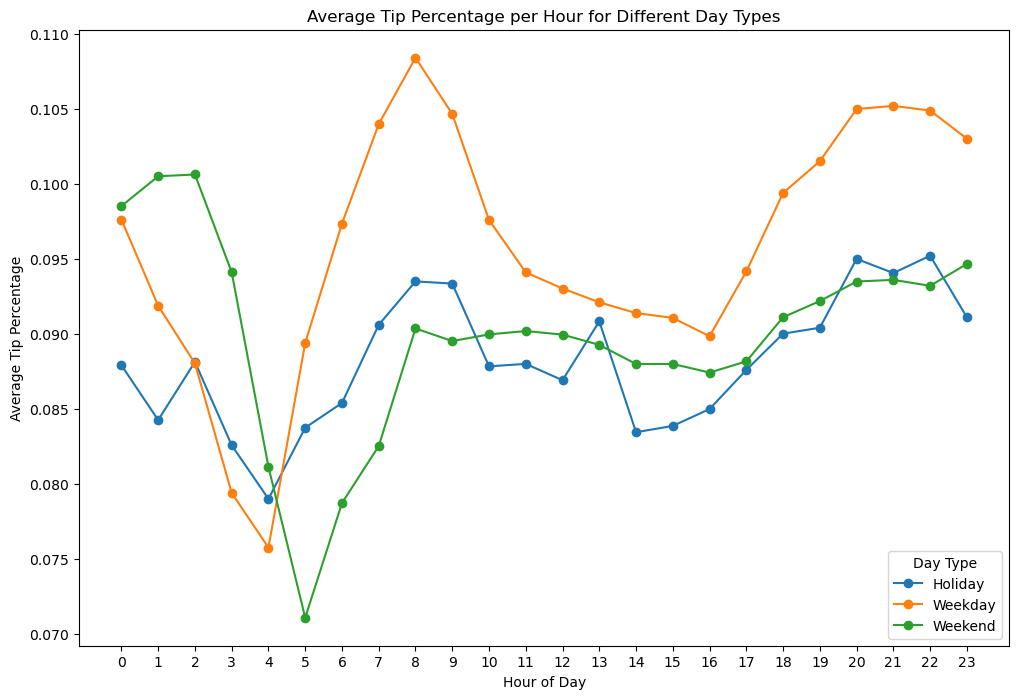

In [27]:
# Plot the line chart with different lines for each peak_day category
plt.figure(figsize=(12, 8))
for day_type in avg_hourly_tip_pct.index:
    plt.plot(avg_hourly_tip_pct.columns, avg_hourly_tip_pct.loc[day_type], marker='o', label=day_type)

plt.xlabel('Hour of Day')
plt.ylabel('Average Tip Percentage')
plt.title('Average Tip Percentage per Hour for Different Day Types')
plt.xticks(range(0, 24))
plt.legend(title='Day Type', loc='lower right')
plt.grid(False)
plt.show()


**Observation**

* Peak time often come with high percentage of tip, example during working start time on Week day
* Late night Weekend also share big percentage of tip

#### 3. Different vendors performance

In [28]:
df.columns

Index(['VendorID', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude', 'RateCodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'pickup_zip',
       'pickup_borough', 'pickup_neighborhood', 'dropoff_zip',
       'dropoff_borough', 'dropoff_neighborhood', 'pickup_date', 'pickup_time',
       'Holiday', 'avg_temp_C', 'Rain', 'Fog', 'Snow', 'weather_type',
       'trip_duration', 'borough_pair', 'trip_duration_minutes', 'day_of_week',
       'peak_day', 'pickup_hour', 'tip_pct', 'tip_pct_gt_0.2'],
      dtype='object')

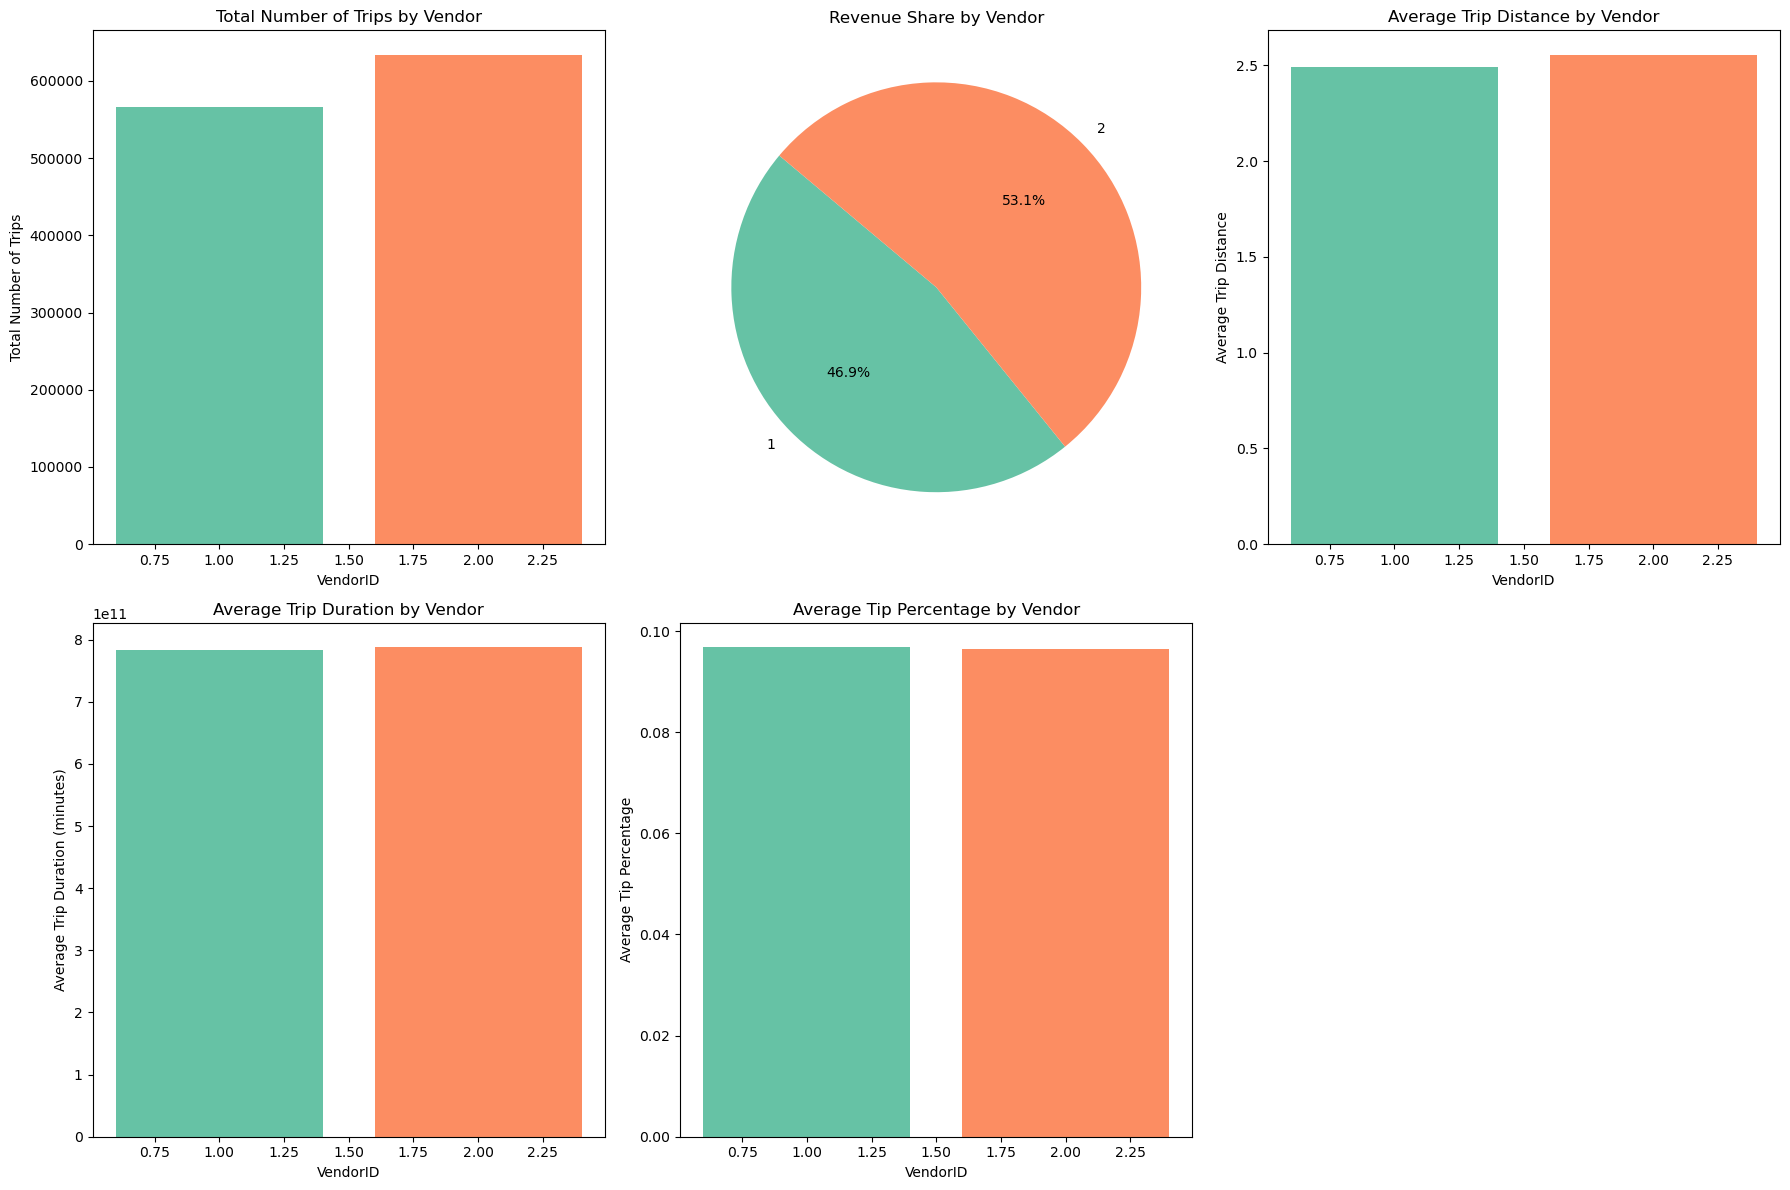

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

vendor_trip_counts = df['VendorID'].value_counts().sort_index()
vendor_revenue = df.groupby('VendorID')['total_amount'].sum()
average_trip_distance = df.groupby('VendorID')['trip_distance'].mean()
average_trip_duration = df.groupby('VendorID')['trip_duration'].mean()
average_tip_percentage = df.groupby('VendorID')['tip_pct'].mean()

# Create a color palette
colors = sns.color_palette('Set2', n_colors=len(vendor_trip_counts.index))

# Create a figure with 5 subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Bar Chart of Total Trips by Vendor
axes[0, 0].bar(vendor_trip_counts.index, vendor_trip_counts.values, color=colors)
axes[0, 0].set_xlabel('VendorID')
axes[0, 0].set_ylabel('Total Number of Trips')
axes[0, 0].set_title('Total Number of Trips by Vendor')

# Pie Chart of Revenue Share by Vendor
axes[0, 1].pie(vendor_revenue, labels=vendor_revenue.index, autopct='%1.1f%%', startangle=140, colors=colors)
axes[0, 1].set_title('Revenue Share by Vendor')

# Bar Chart of Average Trip Distance by Vendor
axes[0, 2].bar(average_trip_distance.index, average_trip_distance.values, color=colors)
axes[0, 2].set_xlabel('VendorID')
axes[0, 2].set_ylabel('Average Trip Distance')
axes[0, 2].set_title('Average Trip Distance by Vendor')

# Bar Chart of Average Trip Duration by Vendor
axes[1, 0].bar(average_trip_duration.index, average_trip_duration.values, color=colors)
axes[1, 0].set_xlabel('VendorID')
axes[1, 0].set_ylabel('Average Trip Duration (minutes)')
axes[1, 0].set_title('Average Trip Duration by Vendor')

# Bar Chart of Average Tip Percentage by Vendor
axes[1, 1].bar(average_tip_percentage.index, average_tip_percentage.values, color=colors)
axes[1, 1].set_xlabel('VendorID')
axes[1, 1].set_ylabel('Average Tip Percentage')
axes[1, 1].set_title('Average Tip Percentage by Vendor')

# Remove empty subplot
fig.delaxes(axes[1, 2])

# Adjust layout
plt.tight_layout()
plt.show()


Both vendor has the same performance in number of trip, trip duration and Tip percentage on total of revenue. However, vendor 2 seems to have taken much lesser distance of trip. It could be based on the station where driver of vendor 2 waiting for their customer.

#### 4. Numer of trips and % tip flutuate by weather

<Figure size 1000x600 with 0 Axes>

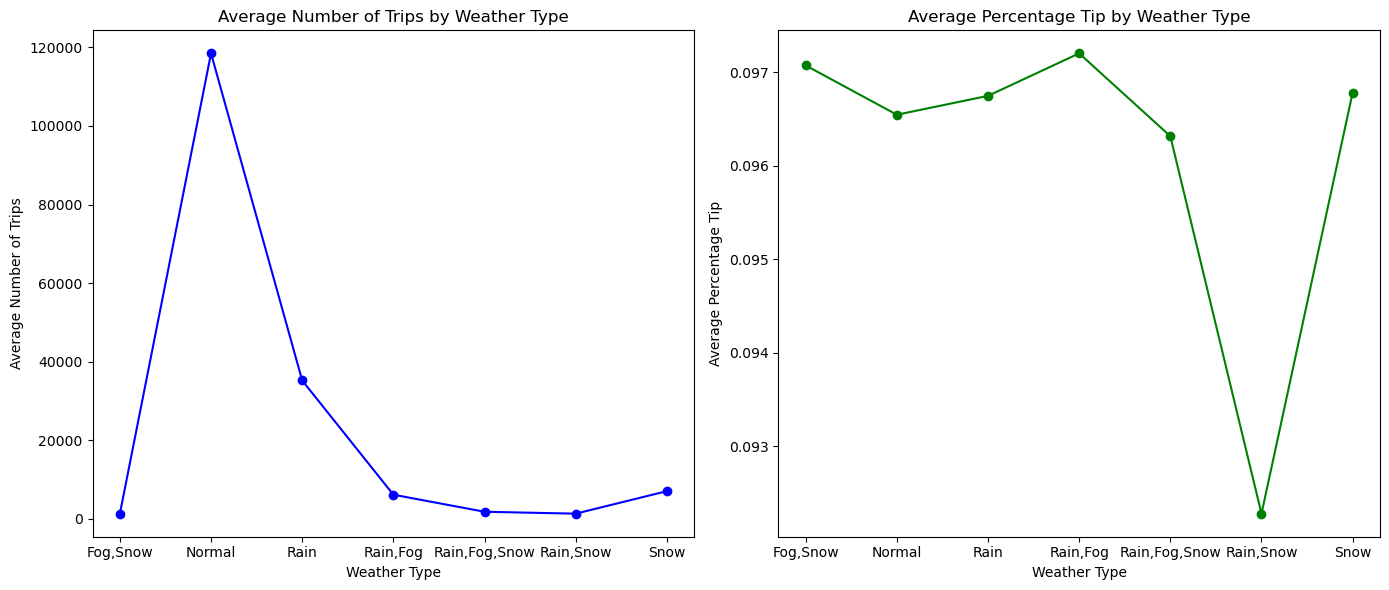

In [30]:
average_trips_by_weather = df.groupby('weather_type').size() / df['weather_type'].nunique()

plt.figure(figsize=(10, 6))
import matplotlib.pyplot as plt
import pandas as pd

# Calculate average number of trips by weather type
average_trips_by_weather = df.groupby('weather_type').size() / df['weather_type'].nunique()

# Calculate average tip percentage by weather type
average_tip_by_weather = df.groupby('weather_type')['tip_pct'].mean()

# Create a figure with 2 subplots arranged left and right
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Line plot for average number of trips by weather type
axes[0].plot(average_trips_by_weather.index, average_trips_by_weather.values, marker='o', color='b')
axes[0].set_xlabel('Weather Type')
axes[0].set_ylabel('Average Number of Trips')
axes[0].set_title('Average Number of Trips by Weather Type')

# Line plot for average tip percentage by weather type
axes[1].plot(average_tip_by_weather.index, average_tip_by_weather.values, marker='o', color='g')
axes[1].set_xlabel('Weather Type')
axes[1].set_ylabel('Average Percentage Tip')
axes[1].set_title('Average Percentage Tip by Weather Type')

# Adjust layout
plt.tight_layout()
plt.show()


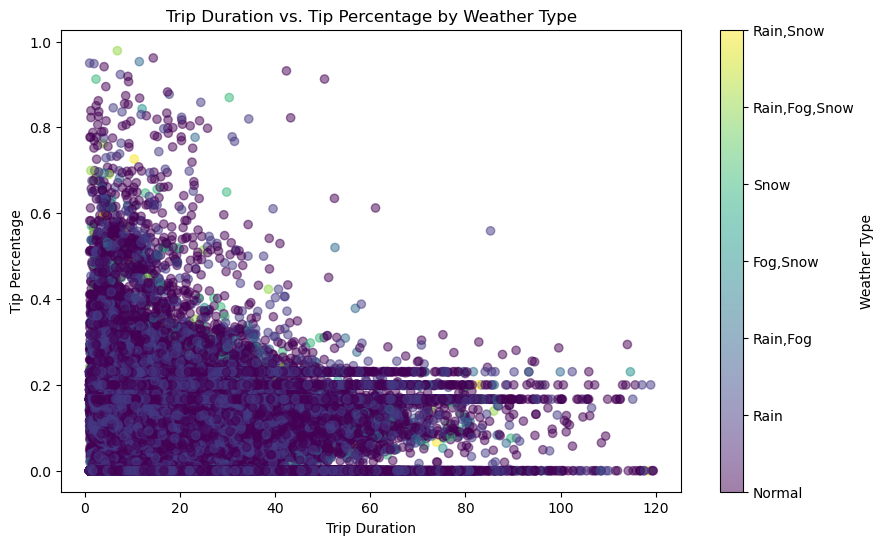

In [31]:
# Create a mapping from weather type to colors
weather_types = df['weather_type'].unique()
weather_type_mapping = {weather: index for index, weather in enumerate(weather_types)}

# Map colors to weather types
colors = df['weather_type'].map(weather_type_mapping)

plt.figure(figsize=(10, 6))
plt.scatter(df['trip_duration_minutes'], df['tip_pct'], c=colors, cmap='viridis', alpha=0.5)
plt.xlabel('Trip Duration')
plt.ylabel('Tip Percentage')
plt.title('Trip Duration vs. Tip Percentage by Weather Type')
colorbar = plt.colorbar(label='Weather Type', ticks=range(len(weather_types)))
colorbar.ax.set_yticklabels(weather_types)
plt.show()


**Observation**

* Demand reduced on bad weather but the tip remained or sometime higher than on the normal day
* There are a noise on the Rain, Snow day where no tip given that affected to the trends in overall

#### 5. Pickup/ Dropoff location and chance to get high tip

In [ ]:
# Group by pickup_borough and tip_pct_gt_0.2
pickup_counts = df.groupby(['pickup_neighborhood', 'tip_pct_gt_0.2']).size().unstack(fill_value=0)

# Calculate the ratio of trips with tip_pct > 0.2
pickup_ratios = pickup_counts[1] / (pickup_counts[1] + pickup_counts[0])

# Calculate the total number of trips based on pickup_neighborhood
total_trips_by_pickup = df['pickup_neighborhood'].value_counts().sort_index()

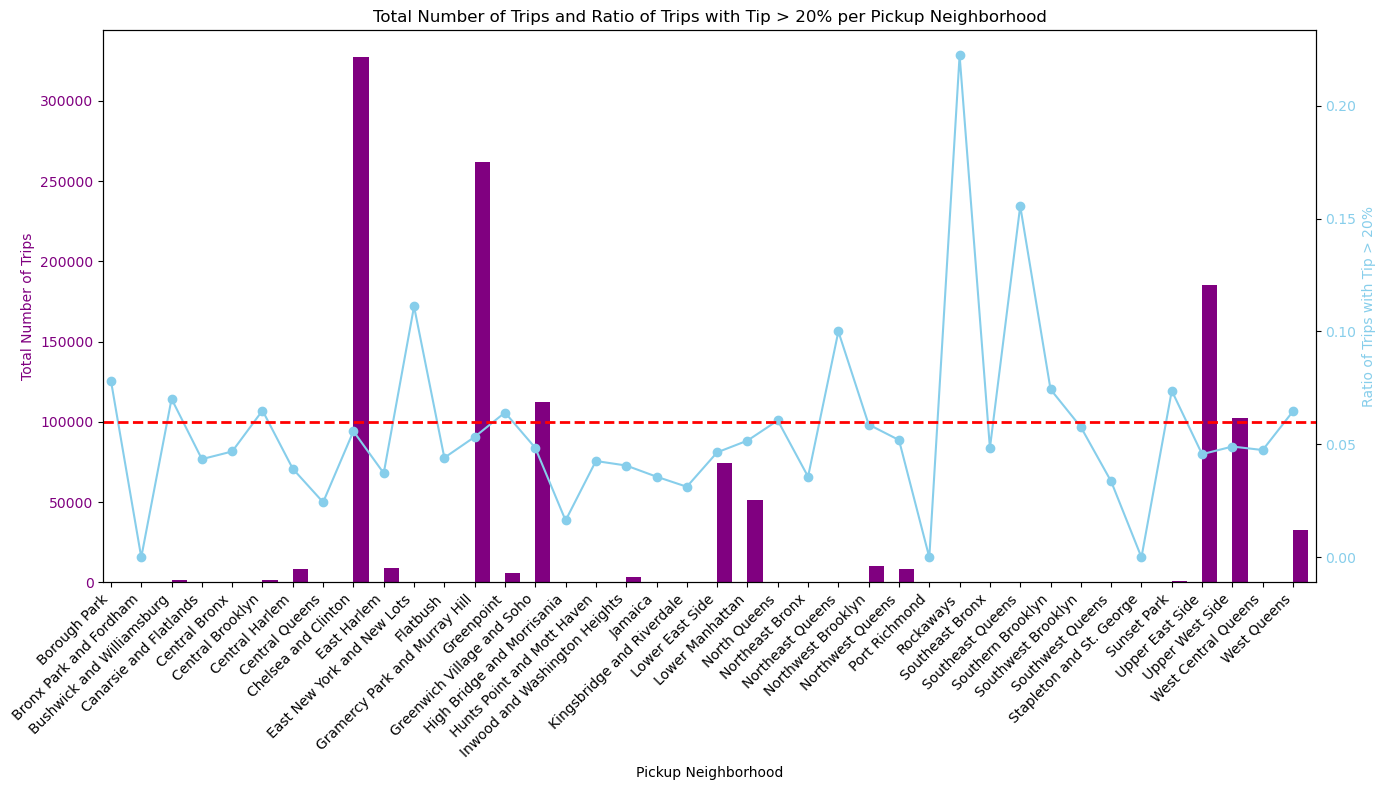

In [93]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot the total number of trips as a bar plot
total_trips_by_pickup.plot(kind='bar', ax=ax1, color='purple', position=0)
ax1.set_xlabel('Pickup Neighborhood')
ax1.set_ylabel('Total Number of Trips', color='purple')
ax1.tick_params(axis='y', labelcolor='purple')
ax1.set_title('Total Number of Trips and Ratio of Trips with Tip > 20% per Pickup Neighborhood')

# Create a secondary y-axis for the pickup ratios
ax2 = ax1.twinx()
pickup_ratios.sort_index().plot(kind='line', ax=ax2, color='skyblue', marker='o')
ax2.set_ylabel('Ratio of Trips with Tip > 20%', color='skyblue')
ax2.tick_params(axis='y', labelcolor='skyblue')

# Add a horizontal line at y=0.12 on the secondary y-axis
ax2.axhline(y=0.06, color='red', linestyle='--', linewidth=2)

# Rotate the x labels for better readability
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()

**Observation:**

* Rockaway and Stouthest Queens are where drivers get highest chance to have more than 20% of tip. However, this is not a busy areas, so only a few trips are require.
* Chelsea and Clinton, Gramercy park and Murray Hill are the hot zone where taxi demand is significantly higher than other regions. The change to get more than 20% was also moderate at around 5-6%
* Potential areas are Greenwich Village & Soho and West Queens with decent amount of trip required and also higher chance for good tip.

#### 7. Weather impact

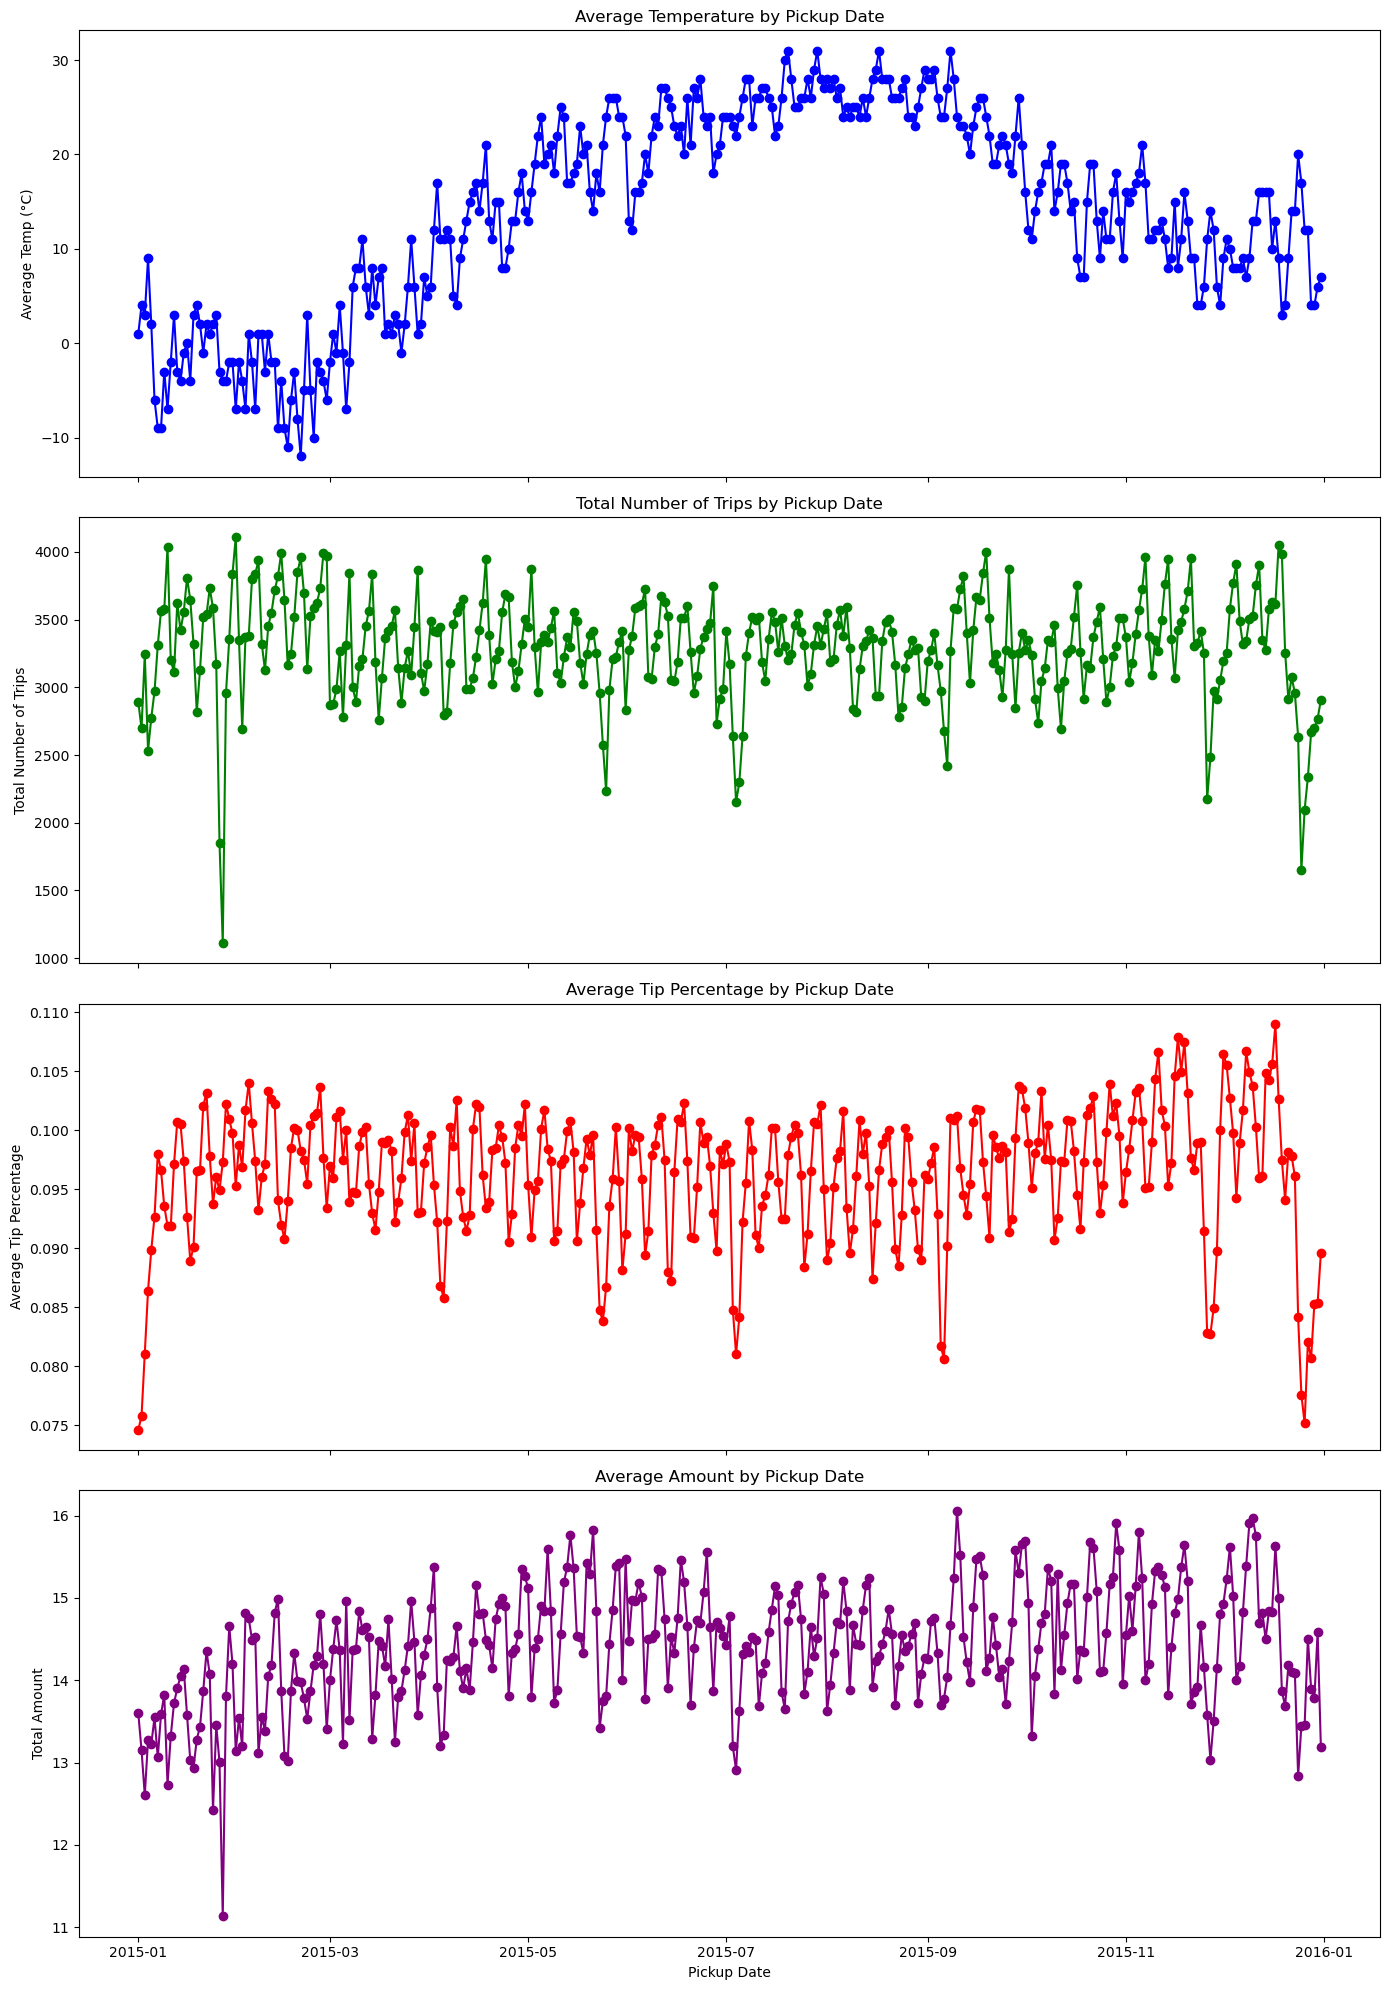

In [33]:
# Group by pickup_date and calculate required values
avg_temp_by_date = df.groupby('pickup_date')['avg_temp_C'].mean()
total_trips_by_date = df.groupby('pickup_date').size()
avg_tip_pct_by_date = df.groupby('pickup_date')['tip_pct'].mean()
avg_amount_by_date = df.groupby('pickup_date')['total_amount'].mean()

# Create a figure with 4 subplots arranged vertically
fig, axes = plt.subplots(4, 1, figsize=(14, 20), sharex=True)

# Line plot for avg_temp_C by pickup_date
axes[0].plot(avg_temp_by_date.index, avg_temp_by_date.values, marker='o', color='b')
axes[0].set_ylabel('Average Temp (°C)')
axes[0].set_title('Average Temperature by Pickup Date')

# Line plot for total number of trips by pickup_date
axes[1].plot(total_trips_by_date.index, total_trips_by_date.values, marker='o', color='g')
axes[1].set_ylabel('Total Number of Trips')
axes[1].set_title('Total Number of Trips by Pickup Date')

# Line plot for avg_tip_pct by pickup_date
axes[2].plot(avg_tip_pct_by_date.index, avg_tip_pct_by_date.values, marker='o', color='r')
axes[2].set_ylabel('Average Tip Percentage')
axes[2].set_title('Average Tip Percentage by Pickup Date')

# Line plot for total_amount by pickup_date
axes[3].plot(avg_amount_by_date.index, avg_amount_by_date.values, marker='o', color='purple')
axes[3].set_xlabel('Pickup Date')
axes[3].set_ylabel('Total Amount')
axes[3].set_title('Average Amount by Pickup Date')

# Adjust layout
plt.tight_layout()
plt.show()

**Observation**

* Regardless the change of temperature, the demand reflect on average daily trip has a stable trends except for a significant drop on the Chrismast day where people already went back home.
* Also due to the blizzard warning, Jan 27 witnessed the bottom of the trips taken in the entire year.


# II. Modeling

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

Checking for multicolinearity

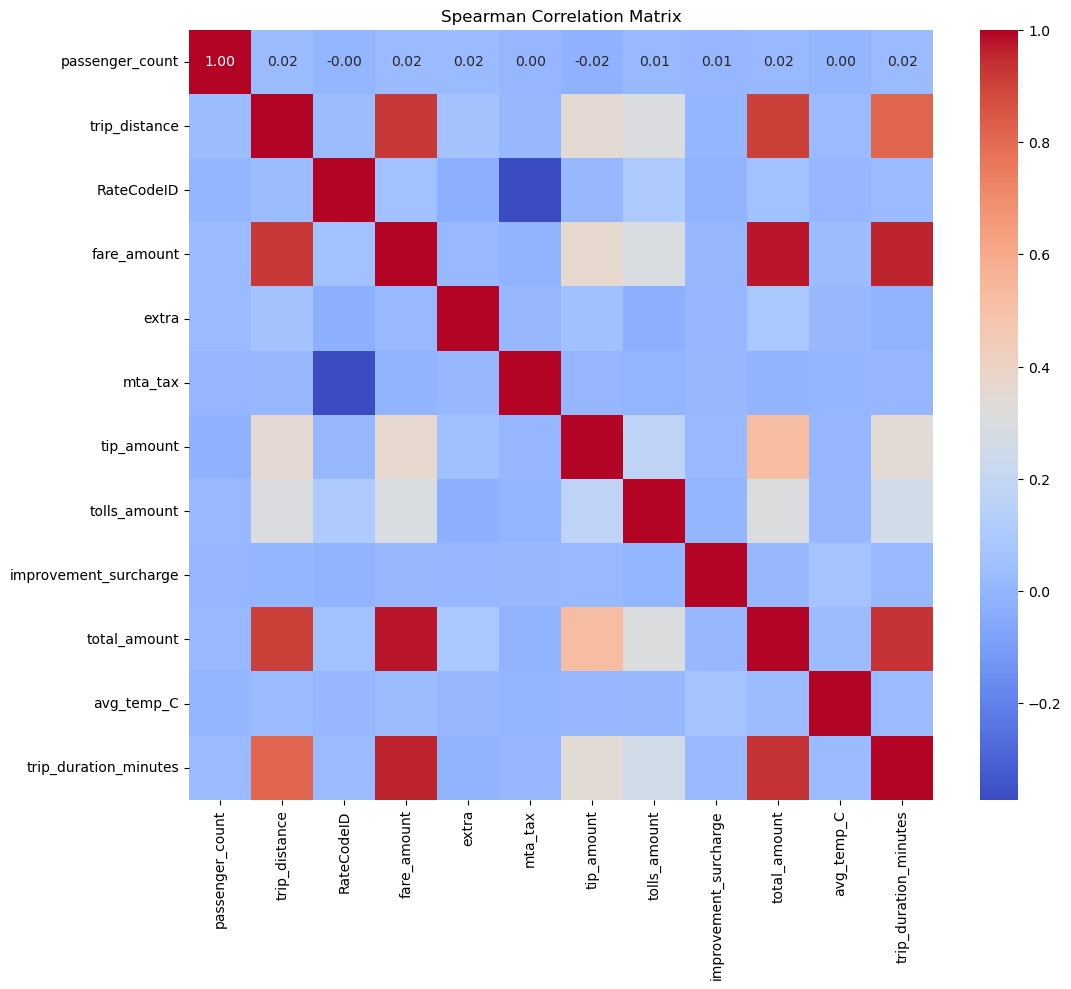

In [35]:
num_cols = ['passenger_count', 'trip_distance', 'RateCodeID',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'avg_temp_C', 'trip_duration_minutes']
df_corr = df[num_cols]

# Calculate Spearman correlation matrix
corr = df_corr.corr(method='spearman')

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Spearman Correlation Matrix')
plt.show()

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculate VIF
df_with_const = add_constant(df[num_cols])

# calculate VIF for each feature
vif = pd.DataFrame()
vif["feature"] = df_with_const.columns
vif["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

vif.sort_values(by='VIF', ascending=False)

,feature,VIF
10,total_amount,167475.659823
4,fare_amount,109722.734663
7,tip_amount,7798.979946
0,const,3360.186100
8,tolls_amount,2003.881958
5,extra,247.740417
12,trip_duration_minutes,5.134586
2,trip_distance,1.631893
6,mta_tax,1.228600
3,RateCodeID,1.036119


There are high multicolinearity between the amount types, extra, and the trip duration. We can try to use PCA to reduce features

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Define features and target
cat_cols = ['VendorID','payment_type','pickup_neighborhood', 'dropoff_neighborhood','Holiday', 'store_and_fwd_flag',
            'Rain', 'Fog', 'Snow','peak_day']
num_cols = ['passenger_count', 'trip_distance', 'RateCodeID',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'avg_temp_C', 'trip_duration_minutes']

X = df[cat_cols + num_cols]
y = df['tip_pct_gt_0.2']



In [38]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=101)
# Check the size
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(959999, 22)
(240000, 22)
(959999,)
(240000,)


### Apply PCA

In [39]:
from sklearn.preprocessing import StandardScaler
numerical_data = df[num_cols]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)
X_scaled = pd.DataFrame(scaled_data, columns=num_cols)
X_scaled.head(3)

,passenger_count,trip_distance,RateCodeID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,avg_temp_C,trip_duration_minutes
0,-0.511477,-0.242870,-0.010621,-0.337709,-0.883968,0.018955,0.223694,-0.182341,0.068097,-0.278915,1.148947,-0.196407
1,1.729601,-0.452767,-0.010621,-0.860423,1.871511,0.018955,-0.756539,-0.182341,0.068097,-0.807750,1.148947,-1.063755
2,-0.511477,-0.360937,-0.010621,0.773058,-0.883968,0.018955,-0.756539,-0.182341,0.068097,0.408571,0.678813,1.774177


Apply PCA to see how many components we need to get at least 80% accuracy

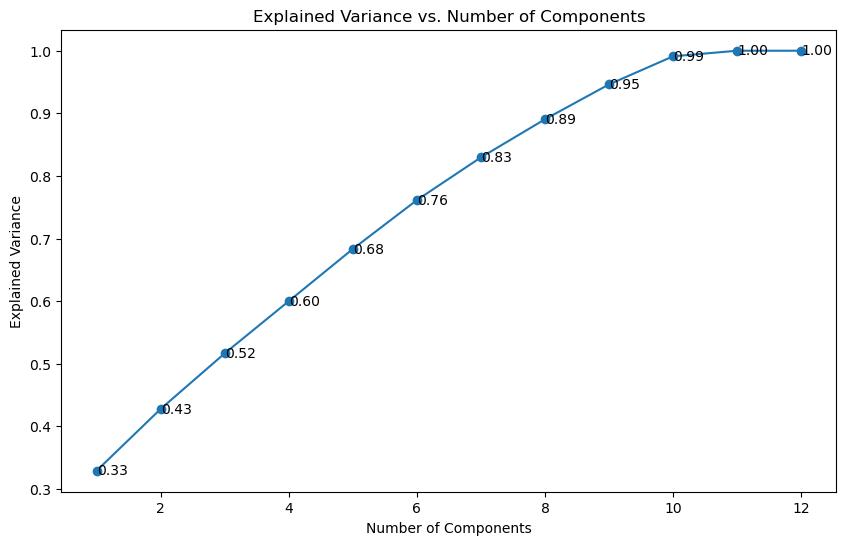

In [40]:
from sklearn.decomposition import PCA


explained_variances = []
num_components = []
for n_components in range(1, len(num_cols)+1):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    explained_variances.append(sum(pca.explained_variance_ratio_))
    num_components.append(n_components)

# Plot the number of components vs. explained variance
plt.figure(figsize=(10, 6))
plt.plot(num_components, explained_variances, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance vs. Number of Components')

# Display the explained variance values next to each dot
for i, (n, ev) in enumerate(zip(num_components, explained_variances)):
    plt.text(n, ev, f'{ev:.2f}', ha='left', va='center')

plt.show()

At 6 components, we can cover roughly 80% of the variance so we can try to reduce from 12 to 6 features first.

In [41]:
pca = PCA(6)
X_pca = pca.fit_transform(X_scaled)
print(pca.explained_variance_ratio_)
print(pca.n_components_)

[0.32917762 0.09868038 0.08879143 0.0833744  0.08332335 0.07806368]
6


In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline for the numerical features
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=6))  # As decided before 79% with 6 components
])

# Create a ColumnTransformer to apply transformations
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, num_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
])

# Combine preprocessor with Random Forest classifier
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit the model
model_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = model_pipeline.predict(X_test)


In [44]:
y_test.value_counts()

tip_pct_gt_0.2
0    227637
1     12363
Name: count, dtype: int64

In [45]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
# Evaluate the model
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
print("\nAuc:")
print(roc_auc)

Confusion Matrix:
[[227482    155]
 [  9125   3238]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    227637
           1       0.95      0.26      0.41     12363

    accuracy                           0.96    240000
   macro avg       0.96      0.63      0.70    240000
weighted avg       0.96      0.96      0.95    240000


Auc:
0.6306148154367154


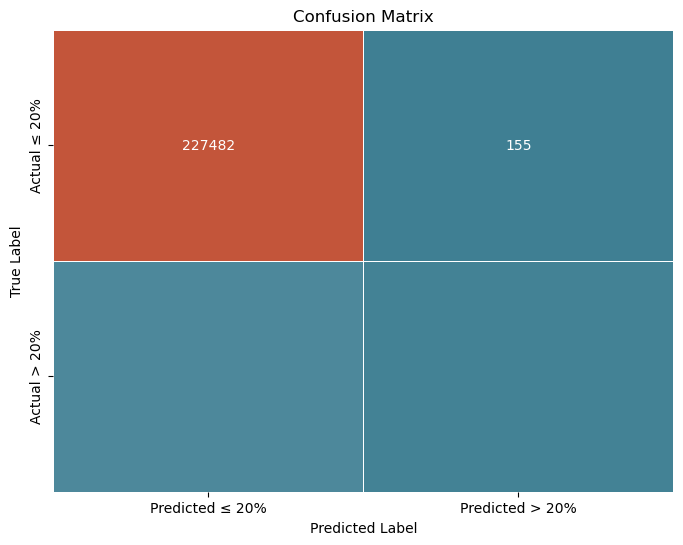

In [46]:
# Create a custom colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Plot the confusion matrix as a heatmap with the custom colormap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, cbar=False, linewidths=.5,
            xticklabels=['Predicted ≤ 20%', 'Predicted > 20%'],
            yticklabels=['Actual ≤ 20%', 'Actual > 20%'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Accuracy performance of the model is very high due to the imbalance from our dataset.
However, recall is low (0.24) means model cannot predict the true positives (case with greater than 20% of tip) so I apply Smote to oversample the minority class and then train a logistic regression model again

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt


# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
    ])

# Define the pipeline with SMOTE and Logistic Regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression())
])

# Splitting data into training and test sets
X = df[num_cols + cat_cols]
y = df['tip_pct_gt_0.2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the pipeline
pipeline.fit(X_train, y_train)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['passenger_count',
                                                   'trip_distance',
                                                   'RateCodeID', 'fare_amount',
                                                   'extra', 'mta_tax',
                                                   'tip_amount', 'tolls_amount',
                                                   'improvement_surcharge',
                                                   'total_amount', 'avg_temp_C',
                                                   'trip_duration_minutes']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['VendorID', 'payment_type',
                                                   'pickup_neighborhood',
                                                   'dropoff_neighborhood',
                                                   'Holiday',
                                                   'store_and_fwd_flag', 'Rain',
                                                   'Fog', 'Snow',
                                                   'peak_day'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', LogisticRegression())])

Confusion Matrix:
[[221294   6303]
 [    71  12332]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    227597
           1       0.66      0.99      0.79     12403

    accuracy                           0.97    240000
   macro avg       0.83      0.98      0.89    240000
weighted avg       0.98      0.97      0.98    240000



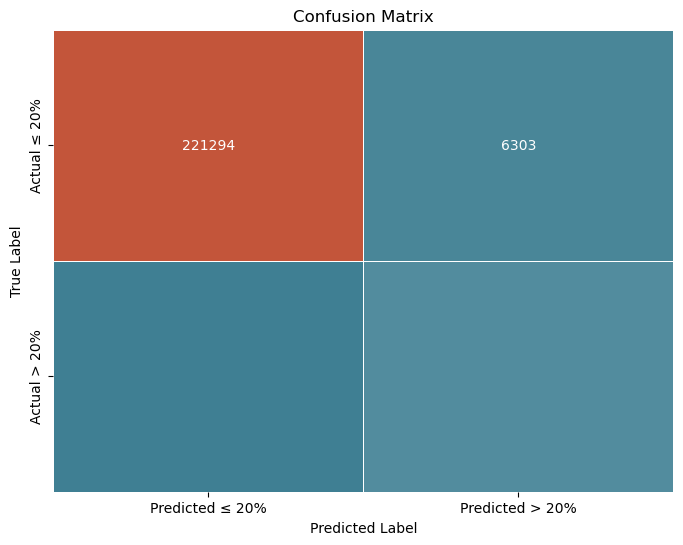

In [56]:
# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create a custom colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Plot the confusion matrix as a heatmap with the custom colormap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, cbar=False, linewidths=.5,
            xticklabels=['Predicted ≤ 20%', 'Predicted > 20%'],
            yticklabels=['Actual ≤ 20%', 'Actual > 20%'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

This time we can see the accuracy still high but the recall now is significantly improved, hence this will be the final model to use.

## Apply XGB for feature importance

In [57]:
import xgboost as xgb
# Define categorical and numerical columns
cat_cols = ['VendorID', 'payment_type', 'pickup_neighborhood', 'dropoff_neighborhood', 'Holiday', 'store_and_fwd_flag',
            'Rain', 'Fog', 'Snow', 'peak_day']
num_cols = ['passenger_count', 'trip_distance', 'RateCodeID',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'avg_temp_C', 'trip_duration_minutes']

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# Create the pipeline with the preprocessor and XGBoost classifier
pipeline_X = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# Define features and target
X = df[cat_cols + num_cols]
y = df['tip_pct_gt_0.2']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the pipelineX
pipeline_X.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['passenger_count',
                                                   'trip_distance',
                                                   'RateCodeID', 'fare_amount',
                                                   'extra', 'mta_tax',
                                                   'tip_amount', 'tolls_amount',
                                                   'improvement_surcharge',
                                                   'total_amount', 'avg_temp_C',
                                                   'trip_duration_minutes']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['VendorID', 'payment_type',
                                                   'pi...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [58]:
# Get feature importances from the trained model
xgb_model = pipeline_X.named_steps['classifier']
feature_importances = xgb_model.feature_importances_

In [59]:
# Extract feature names after preprocessing
preprocessor = pipeline_X.named_steps['preprocessor']
num_features = preprocessor.named_transformers_['num'].get_feature_names_out(num_cols)
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)

# Combine numerical and one-hot encoded feature names
feature_names = list(num_features) + list(cat_features)


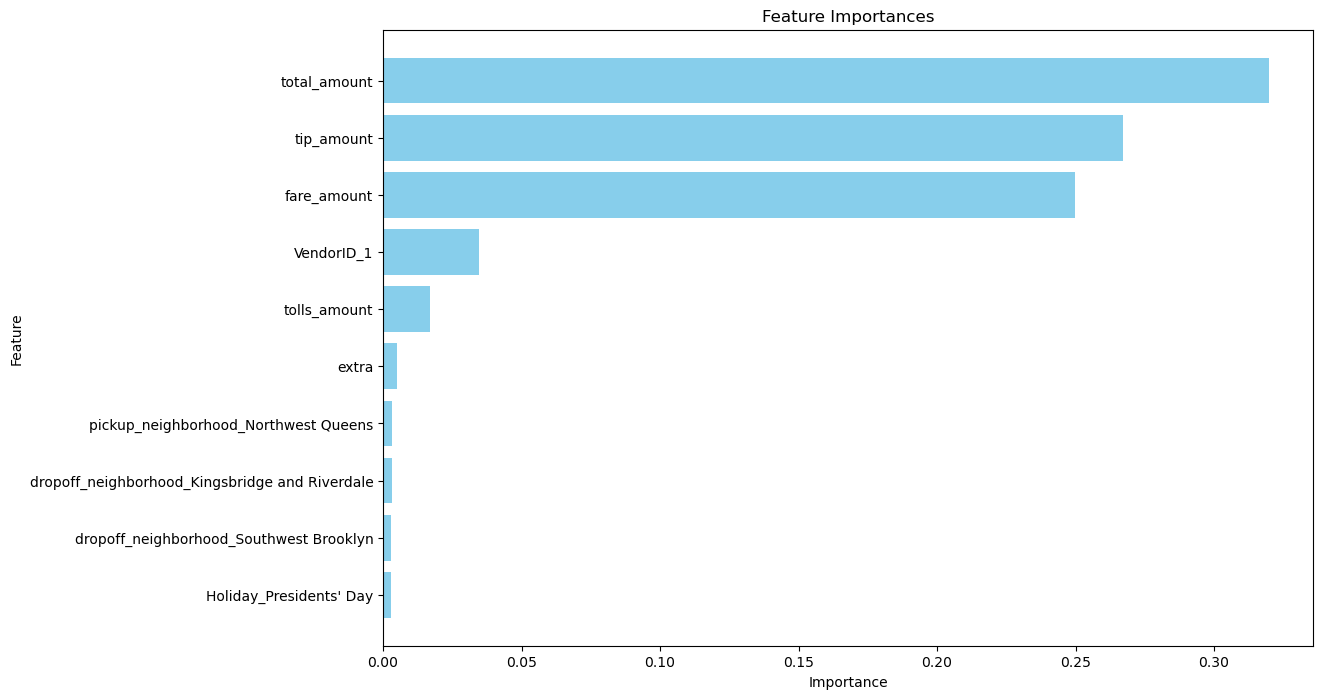

In [60]:
# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance and get only the first 10 features
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

**Observation**:
Top 3 features with most impotance affect on the outcome is the total bill and tip amount, also when the drivers is from Vendor 1.

# III. Conclusion


We can see some factors that might have impact to the demand and tip amount to the drivers. When it is at peak time, the company can allocate more resource to meet up with the demand. And at the mean time, using some promotional on application to draw the passenger on using the service at sometime before or after that period.
Vendor performance does not spark any highlight as their performance are similar. However, weather has an impact when harsh weather, commuting is significantly reduced.
Additionally, pickup location showed that the operation are only popular in some certain areas where we need to focus on. When segmentize by the likelihood of getting higher tip, some neighborhood are highlighted as a potential areas to promote there.



# IV. Next action



*   Present to client the insights and provide some suggestions on operational improvement
*   If there is more feedback, or some areas they would like to see more deepdive into we can prepare for the 2nd meeting


